# Regression Evaluate Exercises

In [6]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import wrangle

- Sum of Squared Errors
    - (Residuals**2).sum()
- Explained sum of squares
    -  ((yhat-baseline)**2).sum()
- Total sum of squares
    - (Sum of Squared Errors) + (Explained Sum of Squares)
- Mean Squared Error
    - (Sum of Squared Errors)/(Count of Residuals)
- Root Mean Squared Error
    - $ \sqrt(Mean Squared Error) $

### 1. Load your zillow dataset.
### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [4]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
0,4,2.0,3633,296425,2005,LA County
1,3,4.0,1620,847770,2011,LA County
2,3,2.0,2077,646760,1926,LA County
3,0,0.0,1200,5328,1972,LA County
4,0,0.0,171,6920,1973,LA County


In [7]:
#Split the dataset
seed = 42

train, validate = train_test_split(df, test_size=0.2,
                                   random_state=seed)

In [8]:
#Create the scaler and fit/transform my square footage column
mms = MinMaxScaler()

train['sq_ft'] = mms.fit_transform(train[['sq_ft']])

train.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
726483,2,2.0,0.001507,619070,1937,LA County
762805,3,2.0,0.001568,424248,1955,Orange County
1231508,3,2.0,0.001452,329233,1929,LA County
1273602,4,2.0,0.001250,48614,1955,LA County
1442984,2,1.0,0.000566,990860,1920,Orange County


In [11]:
#Drop the columns that aren't relevant to the exercises
train.drop(columns=['bedrooms', 'bathrooms', 'year_built', 'location'], inplace=True)

In [12]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(train[['sq_ft']],
                            train['home_value'])

In [13]:
#Generate predictions
yhat = lm.predict(train[['sq_ft']])
yhat

array([359324.14251367, 365637.10873693, 353555.39751656, ...,
       311759.2073488 , 387188.26929218, 319922.52574094])

In [14]:
#Add the predictions to my dataframe
train['yhat'] = yhat
train.head()

,sq_ft,home_value,yhat
726483,0.001507,619070,359324.142514
762805,0.001568,424248,365637.108737
1231508,0.001452,329233,353555.397517
1273602,0.001250,48614,332657.302433
1442984,0.000566,990860,261690.854544


### 3. Plot the residuals for the linear regression model that you made.

In [15]:
#Calculate the residuals as a new column in my dataframe
train['residuals'] = train['yhat'] - train['home_value']
train.head()

,sq_ft,home_value,yhat,residuals
726483,0.001507,619070,359324.142514,-259745.857486
762805,0.001568,424248,365637.108737,-58610.891263
1231508,0.001452,329233,353555.397517,24322.397517
1273602,0.001250,48614,332657.302433,284043.302433
1442984,0.000566,990860,261690.854544,-729169.145456


Text(0.5, 1.0, 'Residual vs Home Value Plot')

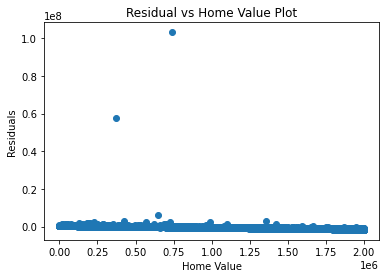

In [16]:
#Plot my residuals over the home value
plt.scatter(x='home_value', y='residuals', data=train)
plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.